In [2]:
from astropy.io import fits
from astropy.table import Table, Column, hstack
import numpy as np
import rafias_lib as rl
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

## Slope Fit

In [113]:
a1_files = []
for n in ['1', '2', '3', '4', '5', '6']:
    a1_files.append(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB'+n+'*_481_SE_2016-*/*.slp.fits'))
print len(a1_files), len(a1_files[0]), len(a1_files[1]), len(a1_files[2]), len(a1_files[3]), len(a1_files[4]), len(a1_files[5])

6 100 100 100 100 100 100


In [114]:
b4_files = []
for n in ['1', '2', '3', '4', '5', '6']:
    b4_files.append(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB'+n+'*_489_SE_2016-*/*.slp.fits'))
print len(b4_files), len(b4_files[0]), len(b4_files[1]), len(b4_files[2]), len(b4_files[3]), len(b4_files[4]), len(b4_files[5])

6 100 100 100 100 100 100


In [115]:
a1_centers = []
for ds in a1_files:
    a1_centers.append(rl.gen_center_g2d(164,161,5,3500,2,2,0,ds))
print len(a1_centers), len(a1_centers[0])
a1_centers

6 100


[[(Parameter('x_mean', value=162.679802128),
   Parameter('y_mean', value=160.049021893)),
  (Parameter('x_mean', value=162.681748501),
   Parameter('y_mean', value=160.058653099)),
  (Parameter('x_mean', value=162.677157257),
   Parameter('y_mean', value=160.056367727)),
  (Parameter('x_mean', value=162.658728955),
   Parameter('y_mean', value=160.055510833)),
  (Parameter('x_mean', value=162.648300776),
   Parameter('y_mean', value=160.052357896)),
  (Parameter('x_mean', value=162.646075771),
   Parameter('y_mean', value=160.044303026)),
  (Parameter('x_mean', value=162.655583678),
   Parameter('y_mean', value=160.047608393)),
  (Parameter('x_mean', value=162.652001398),
   Parameter('y_mean', value=160.030836319)),
  (Parameter('x_mean', value=162.655061826),
   Parameter('y_mean', value=160.03396501)),
  (Parameter('x_mean', value=162.650816224),
   Parameter('y_mean', value=160.020844996)),
  (Parameter('x_mean', value=162.653509329),
   Parameter('y_mean', value=160.017778181)),


In [116]:
b4_centers = []
for ds in b4_files:
    b4_centers.append(rl.gen_center_g2d(160,155,5,4500,2,2,0,ds))
print len(b4_centers), len(b4_centers[0])
b4_centers

6 100


[[(Parameter('x_mean', value=159.246869299),
   Parameter('y_mean', value=154.412385423)),
  (Parameter('x_mean', value=159.241004984),
   Parameter('y_mean', value=154.428373972)),
  (Parameter('x_mean', value=159.242687647),
   Parameter('y_mean', value=154.420199589)),
  (Parameter('x_mean', value=159.224243578),
   Parameter('y_mean', value=154.421561338)),
  (Parameter('x_mean', value=159.216549037),
   Parameter('y_mean', value=154.413274729)),
  (Parameter('x_mean', value=159.20529526),
   Parameter('y_mean', value=154.411308791)),
  (Parameter('x_mean', value=159.215368799),
   Parameter('y_mean', value=154.415847423)),
  (Parameter('x_mean', value=159.211656979),
   Parameter('y_mean', value=154.401660097)),
  (Parameter('x_mean', value=159.224858518),
   Parameter('y_mean', value=154.40300565)),
  (Parameter('x_mean', value=159.220264216),
   Parameter('y_mean', value=154.384888534)),
  (Parameter('x_mean', value=159.218827726),
   Parameter('y_mean', value=154.386266174)),
 

In [117]:
data = []
for x in range(1,7):
    globals()['data%s' % x] = rl.average_residual_flux(a1_centers[x-1], b4_centers[x-1], 3, 9, 10, 
                                                       a1_files[x-1], b4_files[x-1])
    data.append(globals()['data%s' % x])
data

[<Table length=100>
 a1_b4_raw_flux a1_b4_bkg_flux  a1_res_flux  ... a1_b4_res_flux    Time  
    float64        float64        float64    ...    float64      float64 
 -------------- -------------- ------------- ... -------------- ---------
  30734.2329088  1037.92425679 29043.0368758 ...  30242.5845766       0.0
  30877.3408923  1285.72712173 29250.4939404 ...  30268.3122556   4.26288
  29675.3526626  -984.03821518 29109.9538646 ...  30141.4760277   8.52576
  30373.0813278  450.920327131   29009.79059 ...  30159.4874886  12.78864
  30187.6916336 -4.93655756988 29120.0045714 ...   30190.030003  17.05152
  30328.2021932  264.440594736 29110.9837216 ...  30202.9408589   21.3144
  30376.0978725  254.236901063 29192.2187476 ...  30255.6698668  25.57728
  29915.3951188  -394.65553773 29026.6733573 ...  30102.3372156  29.84016
  30585.1508222  752.491795867 29207.6179263 ...    30228.70734  34.10304
  30044.2947846 -72.0372898182 29041.5171848 ...  30078.4177114  38.36592
            ...   

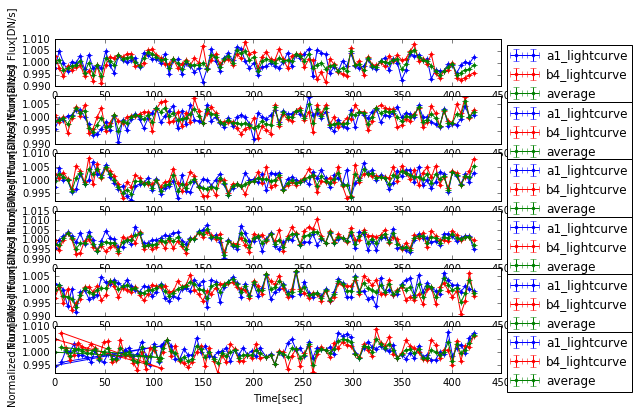

In [118]:
#Comparing light curves
for i in range(1,7):
    plt.subplot(6, 1, i)
    rl.light_curve(data[i-1]['Time'], data[i-1]['a1_res_flux'], 0, 0, '.-', 'a1_lightcurve')
    rl.light_curve(data[i-1]['Time'], data[i-1]['b4_res_flux'], 0, 0, 'r.-', 'b4_lightcurve')
    rl.light_curve(data[i-1]['Time'], data[i-1]['a1_b4_res_flux'], 0, 0, 'g.-', 'average')
    plt.legend(loc = 'best', bbox_to_anchor = (1,1))

In [119]:
#Comparing Measured error/ Standard Deviation
stdev = Table(names = ('Test Number', 'Stdev'))
for i in range(1,7):
    st_dev = np.std(data[i-1]['a1_b4_res_flux']/np.median(data[i-1]['a1_b4_res_flux']))
    stdev.add_row([i, st_dev])
stdev

Test Number,Stdev
float64,float64
1.0,0.00249575732865
2.0,0.00235944247203
3.0,0.00235734924709
4.0,0.00266547978379
5.0,0.00220891424407
6.0,0.00228684522785


In [120]:
#Comparing ideal noise/ Expected error
error = Table(names = ('Test Number', 'Error'))
for i in range(1,7):
    a1_error = rl.norm_flux_error(data[i-1]['a1_res_flux'], 2.2, a1_files[i-1])
    b4_error = rl.norm_flux_error(data[i-1]['b4_res_flux'], 2.5, b4_files[i-1])
    av_error = 0.5*(np.sqrt(np.square(a1_error)+np.square(b4_error)))
    med_error = np.median(av_error)
    error.add_row([i, med_error])
error

Test Number,Error
float64,float64
1.0,0.00148953571492
2.0,0.00148539069501
3.0,0.00149153753321
4.0,0.00148816333495
5.0,0.00148893410651
6.0,0.00148680022441


## Red Files (Slope1)
##### Slope1 = (plane2 - plane1)/time

In [4]:
a1_files_red = []
for n in ['1', '2', '3', '4', '5', '6']:
    a1_files_red.append(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB'+n+'*_481_SE_2016-*/*.red.fits'))
print len(a1_files_red), len(a1_files_red[0]), len(a1_files_red[1]), len(a1_files_red[2]), len(a1_files_red[3]), len(a1_files_red[4]), len(a1_files_red[5])

6 100 100 100 100 100 100


In [5]:
b4_files_red = []
for n in ['1', '2', '3', '4', '5', '6']:
    b4_files_red.append(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821CLRSUB'+n+'*_489_SE_2016-*/*.red.fits'))
print len(b4_files_red), len(b4_files_red[0]), len(b4_files_red[1]), len(b4_files_red[2]), len(b4_files_red[3]), len(b4_files_red[4]), len(b4_files_red[5])

6 100 100 100 100 100 100


In [123]:
a1_centers_red1 = []
for ds in a1_files_red:
    a1_centers_red1.append(rl.gen_center_g2d(164,161,5,3500,2,2,0,ds, red_files = True))
print len(a1_centers_red1), len(a1_centers_red1[0])
a1_centers_red1

6 100


[[(Parameter('x_mean', value=162.681375242),
   Parameter('y_mean', value=160.052395659)),
  (Parameter('x_mean', value=162.682303609),
   Parameter('y_mean', value=160.0576993)),
  (Parameter('x_mean', value=162.670145955),
   Parameter('y_mean', value=160.053699968)),
  (Parameter('x_mean', value=162.658899508),
   Parameter('y_mean', value=160.057550411)),
  (Parameter('x_mean', value=162.650513579),
   Parameter('y_mean', value=160.049145371)),
  (Parameter('x_mean', value=162.641657752),
   Parameter('y_mean', value=160.048164616)),
  (Parameter('x_mean', value=162.654246861),
   Parameter('y_mean', value=160.051658216)),
  (Parameter('x_mean', value=162.650363393),
   Parameter('y_mean', value=160.037139141)),
  (Parameter('x_mean', value=162.650642763),
   Parameter('y_mean', value=160.033158011)),
  (Parameter('x_mean', value=162.649395557),
   Parameter('y_mean', value=160.024548284)),
  (Parameter('x_mean', value=162.656271375),
   Parameter('y_mean', value=160.01869507)),
  

In [124]:
b4_centers_red1 = []
for ds in b4_files_red:
    b4_centers_red1.append(rl.gen_center_g2d(160,155,5,4500,2,2,0,ds, red_files = True))
print len(b4_centers_red1), len(b4_centers_red1[0])
b4_centers_red1

6 100


[[(Parameter('x_mean', value=159.244418523),
   Parameter('y_mean', value=154.412403531)),
  (Parameter('x_mean', value=159.23870259),
   Parameter('y_mean', value=154.431744463)),
  (Parameter('x_mean', value=159.245937153),
   Parameter('y_mean', value=154.412169824)),
  (Parameter('x_mean', value=159.225020486),
   Parameter('y_mean', value=154.428598081)),
  (Parameter('x_mean', value=159.209849437),
   Parameter('y_mean', value=154.409146394)),
  (Parameter('x_mean', value=159.203082221),
   Parameter('y_mean', value=154.409769664)),
  (Parameter('x_mean', value=159.216370118),
   Parameter('y_mean', value=154.41739478)),
  (Parameter('x_mean', value=159.208538547),
   Parameter('y_mean', value=154.401092608)),
  (Parameter('x_mean', value=159.226228161),
   Parameter('y_mean', value=154.402476633)),
  (Parameter('x_mean', value=159.220364649),
   Parameter('y_mean', value=154.387845849)),
  (Parameter('x_mean', value=159.221051254),
   Parameter('y_mean', value=154.392058469)),
 

In [125]:
data_red1 = []
for x in range(1,7):
    globals()['data%s' % x] = rl.average_residual_flux(a1_centers_red1[x-1], b4_centers_red1[x-1], 3, 9, 10, 
                                                       a1_files_red[x-1], b4_files_red[x-1], red_files = True)
    data_red1.append(globals()['data%s' % x])
data_red1

[<Table length=100>
 a1_b4_raw_flux a1_b4_bkg_flux  a1_res_flux  ... a1_b4_res_flux    Time  
    float64        float64        float64    ...    float64      float64 
 -------------- -------------- ------------- ... -------------- ---------
  14957.5197059 -266.914001027 14504.8024462 ...  15083.9526537       0.0
  15708.2356826  1232.82385781 14575.0213198 ...  15124.2664868   4.26288
  14823.9278534 -623.310303382 14526.0931383 ...  15119.1801023   8.52576
  15333.7536163  594.889448482 14474.6070127 ...  15051.9638775  12.78864
  15336.4470274  611.645884447 14508.2144269 ...  15046.7200295  17.05152
  14946.7682274  -308.99527003 14576.1851908 ...  15093.1344079   21.3144
  15223.6099431  228.531777164 14567.0476143 ...  15115.3580487  25.57728
  14604.9236984 -732.873972066 14378.3000425 ...  14952.0745273  29.84016
   15196.182266  223.503563451 14556.5922827 ...   15090.312157  34.10304
  14781.4213571 -502.262305696 14532.9796805 ...  15019.3350809  38.36592
            ...   

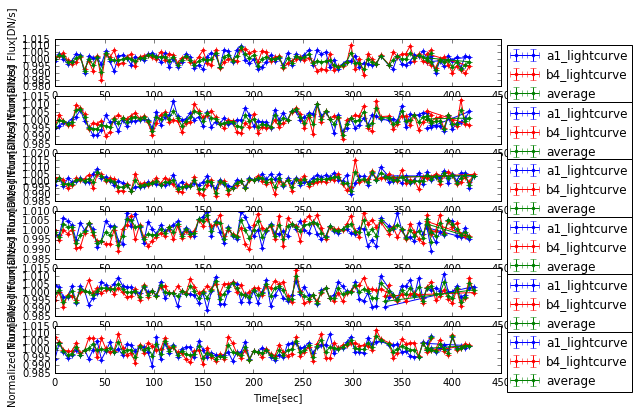

In [126]:
#Comparing light curves
for i in range(1,7):
    plt.subplot(6, 1, i)
    rl.light_curve(data_red1[i-1]['Time'], data_red1[i-1]['a1_res_flux'], 0, 0, '.-', 'a1_lightcurve')
    rl.light_curve(data_red1[i-1]['Time'], data_red1[i-1]['b4_res_flux'], 0, 0, 'r.-', 'b4_lightcurve')
    rl.light_curve(data_red1[i-1]['Time'], data_red1[i-1]['a1_b4_res_flux'], 0, 0, 'g.-', 'average')
    plt.legend(loc = 'best', bbox_to_anchor = (1,1))

In [127]:
#Comparing Measured error/ Standard Deviation
stdev_red1 = Table(names = ('Test Number', 'Stdev'))
for i in range(1,7):
    st_dev = np.std(data_red1[i-1]['a1_b4_res_flux']/np.median(data_red1[i-1]['a1_b4_res_flux']))
    stdev_red1.add_row([i, st_dev])
stdev_red1

Test Number,Stdev
float64,float64
1.0,0.00322733645804
2.0,0.00343058428798
3.0,0.00314925443734
4.0,0.00332845217008
5.0,0.00327899760618
6.0,0.00314990145911


In [128]:
#Comparing ideal noise/ Expected error
error_red1 = Table(names = ('Test Number', 'Error'))
for i in range(1,7):
    a1_error = rl.norm_flux_error(data_red1[i-1]['a1_res_flux'], 2.2, a1_files_red[i-1])
    b4_error = rl.norm_flux_error(data_red1[i-1]['b4_res_flux'], 2.5, b4_files_red[i-1])
    av_error = 0.5*(np.sqrt(np.square(a1_error)+np.square(b4_error)))
    med_error = np.median(av_error)
    error_red1.add_row([i, med_error])
error_red1

Test Number,Error
float64,float64
1.0,0.00210876761165
2.0,0.00210345107338
3.0,0.00211164135007
4.0,0.00210703154785
5.0,0.00210830591256
6.0,0.00210534727477


## Red Files (Slope2)
##### Slope2 = Plane2

In [11]:
a1_centers_red2 = []
for ds in a1_files_red:
    a1_centers_red2.append(rl.gen_center_g2d(164,161,5,3500,2,2,0,ds, red_files = True, rf_slope = True)[0])
print len(a1_centers_red2), len(a1_centers_red2[0])
a1_centers_red2

6 100


[[(Parameter('x_mean', value=162.890280573),
   Parameter('y_mean', value=160.260448139)),
  (Parameter('x_mean', value=162.883921288),
   Parameter('y_mean', value=160.283392982)),
  (Parameter('x_mean', value=162.885408526),
   Parameter('y_mean', value=160.279776662)),
  (Parameter('x_mean', value=162.87091078),
   Parameter('y_mean', value=160.26824133)),
  (Parameter('x_mean', value=162.862550099),
   Parameter('y_mean', value=160.275780756)),
  (Parameter('x_mean', value=162.856116952),
   Parameter('y_mean', value=160.254364356)),
  (Parameter('x_mean', value=162.864100583),
   Parameter('y_mean', value=160.263197064)),
  (Parameter('x_mean', value=162.862711781),
   Parameter('y_mean', value=160.253348339)),
  (Parameter('x_mean', value=162.863191019),
   Parameter('y_mean', value=160.26286659)),
  (Parameter('x_mean', value=162.868102419),
   Parameter('y_mean', value=160.259559274)),
  (Parameter('x_mean', value=162.865380252),
   Parameter('y_mean', value=160.243850324)),
  

In [12]:
b4_centers_red2 = []
for ds in b4_files_red:
    b4_centers_red2.append(rl.gen_center_g2d(160,155,5,4500,2,2,0,ds, red_files = True, rf_slope = True)[0])
print len(b4_centers_red2), len(b4_centers_red2[0])
b4_centers_red2

6 100


[[(Parameter('x_mean', value=159.381381869),
   Parameter('y_mean', value=154.417055267)),
  (Parameter('x_mean', value=159.375563255),
   Parameter('y_mean', value=154.425112132)),
  (Parameter('x_mean', value=159.374234438),
   Parameter('y_mean', value=154.428912163)),
  (Parameter('x_mean', value=159.36344071),
   Parameter('y_mean', value=154.416529595)),
  (Parameter('x_mean', value=159.363541998),
   Parameter('y_mean', value=154.43020639)),
  (Parameter('x_mean', value=159.355402885),
   Parameter('y_mean', value=154.410880967)),
  (Parameter('x_mean', value=159.359380611),
   Parameter('y_mean', value=154.417350054)),
  (Parameter('x_mean', value=159.359938439),
   Parameter('y_mean', value=154.419164188)),
  (Parameter('x_mean', value=159.363142713),
   Parameter('y_mean', value=154.419461905)),
  (Parameter('x_mean', value=159.364568265),
   Parameter('y_mean', value=154.405721255)),
  (Parameter('x_mean', value=159.360964889),
   Parameter('y_mean', value=154.415154014)),
 

In [13]:
focused_rt = rl.radius_testing(a1_centers_red2[0], 2, 10, 1, 5, 15, 1, 8, 20, 1, a1_files_red[0], 
                                red_files = True, rf_slope = True)
focused_rt

The minimum Standard deviation is 0.002958
It occurs for the radius r = 3.000000
It occurs for the inner radius r_in = 14.000000
It occurs for the outer radius r_out = 18.000000


Median_Res_Flux,St_Dev,norm_stdev,r_source,r_in,r_out,rIn - r,rOut - rIn
float64,float64,float64,float64,float64,float64,float64,float64
24747.3080909,100.340611151,0.00405460710244,2.0,5.0,8.0,3.0,3.0
24651.7553119,99.6548947799,0.00404250705554,2.0,5.0,9.0,3.0,4.0
24745.4400571,100.314249449,0.00405384786926,2.0,5.0,10.0,3.0,5.0
24679.7182831,99.3805994629,0.00402681255608,2.0,5.0,11.0,3.0,6.0
24733.0583646,100.212173716,0.00405175018144,2.0,5.0,12.0,3.0,7.0
24695.7315492,99.7372811089,0.00403864452892,2.0,5.0,13.0,3.0,8.0
24737.8465834,100.384873049,0.00405794710992,2.0,5.0,14.0,3.0,9.0
24708.2113386,99.9428030921,0.00404492262603,2.0,5.0,15.0,3.0,10.0
24744.8542611,100.316548251,0.00405403673801,2.0,5.0,16.0,3.0,11.0


In [14]:
focused_rtused_rtused_rt.write('focused_rt.csv')

In [131]:
data_red2 = []
for x in range(1,7):
    globals()['data%s' % x] = rl.average_residual_flux(a1_centers_red2[x-1], b4_centers_red2[x-1], 3, 9, 10, 
                                                       a1_files_red[x-1], b4_files_red[x-1], red_files = True, rf_slope = True)
    data_red2.append(globals()['data%s' % x])
data_red2

[<Table length=100>
 a1_b4_raw_flux a1_b4_bkg_flux  a1_res_flux  ... a1_b4_res_flux    Time  
    float64        float64        float64    ...    float64      float64 
 -------------- -------------- ------------- ... -------------- ---------
  97338.9849564  141057.248766 29958.8833489 ...  30522.3934355       0.0
  97938.3526796  141986.136692 30111.2942694 ...  30681.7616151   4.26288
  96988.9623025  140178.739939 30047.4021247 ...   30588.506542   8.52576
  97293.2304901  140677.087712 30010.5247944 ...  30656.7152583  12.78864
  97014.9264401   140512.27303 30058.4461022 ...  30456.4813205  17.05152
  97189.2067313  140613.716474 29952.9410929 ...  30582.7094542   21.3144
  97114.4207185  140488.364441 29955.5003869 ...    30567.30072  25.57728
  97062.7171185  140628.067486 29875.9578327 ...  30449.4219934  29.84016
  97119.4909793  140323.604602 30136.3068109 ...  30650.4151153  34.10304
  97088.4944831   140540.25241   29902.11706 ...  30516.7959734  38.36592
            ...   

In [154]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

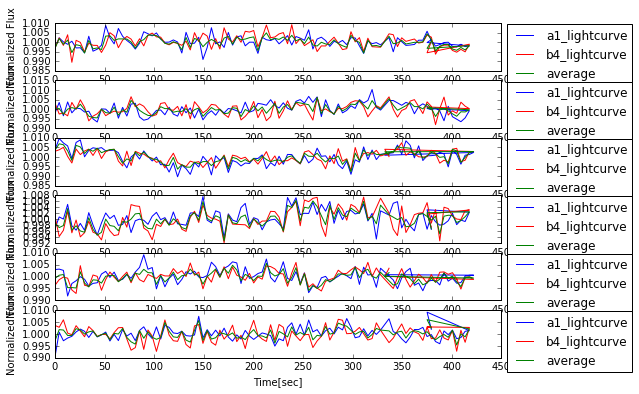

In [159]:
#Comparing light curves
for i in range(1,7):
    plt.subplot(6, 1, i)
    rl.light_curve(data_red2[i-1]['Time'], data_red2[i-1]['a1_res_flux'], '-', lbl = 'a1_lightcurve')
    rl.light_curve(data_red2[i-1]['Time'], data_red2[i-1]['b4_res_flux'], 'r-', lbl ='b4_lightcurve')
    rl.light_curve(data_red2[i-1]['Time'], data_red2[i-1]['a1_b4_res_flux'], 'g-', lbl ='average')
    plt.legend(loc = 'upper left', bbox_to_anchor = (1,1.1))
    plt.ylabel('Normalized Flux')

In [133]:
#Comparing Measured error/ Standard Deviation
stdev_red2 = Table(names = ('Test Number', 'Stdev'))
for i in range(1,7):
    st_dev = np.std(data_red2[i-1]['a1_b4_res_flux']/np.median(data_red2[i-1]['a1_b4_res_flux']))
    stdev_red2.add_row([i, st_dev])
stdev_red2

Test Number,Stdev
float64,float64
1.0,0.00243013746155
2.0,0.00222227023054
3.0,0.0030754723426
4.0,0.0026987297651
5.0,0.00230456008722
6.0,0.00201753218843


In [134]:
#Comparing ideal noise/ Expected error
error_red2 = Table(names = ('Test Number', 'Error'))
for i in range(1,7):
    a1_error = rl.norm_flux_error(data_red2[i-1]['a1_res_flux'], 2.2, a1_files_red[i-1])
    b4_error = rl.norm_flux_error(data_red2[i-1]['b4_res_flux'], 2.5, b4_files_red[i-1])
    av_error = 0.5*(np.sqrt(np.square(a1_error)+np.square(b4_error)))
    med_error = np.median(av_error)
    error_red2.add_row([i, med_error])
error_red2

Test Number,Error
float64,float64
1.0,0.00147817328471
2.0,0.00148187865011
3.0,0.00148367822181
4.0,0.00147759327245
5.0,0.00147987937028
6.0,0.00147612340957


## Results

In [135]:
error_comparison = Table()
error_comparison['Test'] = [1,2,3,4,5,6]
error_comparison['Slope'] = error['Error']
error_comparison['Red1'] = error_red1['Error']
error_comparison['Red2'] = error_red2['Error']
error_comparison

Test,Slope,Red1,Red2
int64,float64,float64,float64
1,0.00148953571492,0.00210876761165,0.00147817328471
2,0.00148539069501,0.00210345107338,0.00148187865011
3,0.00149153753321,0.00211164135007,0.00148367822181
4,0.00148816333495,0.00210703154785,0.00147759327245
5,0.00148893410651,0.00210830591256,0.00147987937028
6,0.00148680022441,0.00210534727477,0.00147612340957


In [136]:
stdev_comparison = Table()
stdev_comparison['Test'] = [1,2,3,4,5,6]
stdev_comparison['Slope'] = stdev['Stdev']
stdev_comparison['Red1'] = stdev_red1['Stdev']
stdev_comparison['Red2'] = stdev_red2['Stdev']
stdev_comparison

Test,Slope,Red1,Red2
int64,float64,float64,float64
1,0.00249575732865,0.00322733645804,0.00243013746155
2,0.00235944247203,0.00343058428798,0.00222227023054
3,0.00235734924709,0.00314925443734,0.0030754723426
4,0.00266547978379,0.00332845217008,0.0026987297651
5,0.00220891424407,0.00327899760618,0.00230456008722
6,0.00228684522785,0.00314990145911,0.00201753218843


## Ignore From This Point

standard deviation = 0.003115


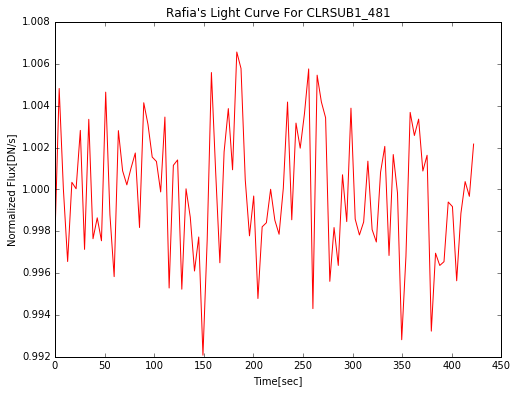

In [160]:
rl.light_curve(data[0]['Time'], data[0]['a1_res_flux'], 'r-')
plt.title('Rafia\'s Light Curve For CLRSUB1_481')
print 'standard deviation = %f' % (np.std(data[0]['a1_res_flux']/np.median(data[0]['a1_res_flux'])))